### ***Importing Libraries***

This cell imports various libraries and modules required for data analysis, visualization, preprocessing, machine learning, and deep learning tasks:

1. **Joblib**: Used for saving and loading models or large objects efficiently.
2. **JSON**: Handles reading and writing JSON data.
3. **NumPy**: Provides support for numerical computations and working with arrays.
4. **Pandas**: Used for data manipulation and analysis.
5. **Seaborn**: Facilitates advanced data visualization.
6. **TensorFlow**: A deep learning framework for building and training neural networks.
7. **Hugging Face Hub**: For accessing pre-trained models and other resources.
8. **Scikit-learn**:
   - **Decomposition (PCA)**: For dimensionality reduction.
   - **Ensemble (RandomForestClassifier)**: For ensemble learning methods.
   - **Metrics**: To evaluate model performance (e.g., accuracy, confusion matrix, ROC-AUC).
   - **Model Selection**: For cross-validation and hyperparameter tuning.
   - **Preprocessing (StandardScaler)**: For feature scaling.
   - **Linear Models (LogisticRegression)**: For regression and classification tasks.
   - **Neighbors (KNeighborsClassifier)**: For nearest neighbor algorithms.
   - **Neural Network (MLPClassifier)**: For building basic neural networks.
   - **Pipeline**: To streamline machine learning workflows.
   - **Support Vector Machines (SVC)**: For classification and regression tasks.
   - **Naive Bayes**: For probabilistic classification.
9. **TensorFlow Keras**: For building deep learning models using layers and optimizers.
10. **Matplotlib**: For generating visualizations and plots.

This combination of libraries enables a comprehensive workflow from data preprocessing to advanced model training and evaluation.

In [ ]:
import joblib
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from huggingface_hub import notebook_login
import huggingface_hub as hf
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, log_loss, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# import legend
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

***Loading the Dataset***

This cell loads the dataset into a Pandas DataFrame from the specified path (hf://datasets/prabinpanta0/genki_hospital/hospital_readmissions.csv).

The pd.read_csv function reads the CSV file and stores it as a DataFrame object, allowing for structured data manipulation and analysis.

In [ ]:
# Load the data
df = pd.read_csv("hf://datasets/prabinpanta0/genki_hospital/hospital_readmissions.csv")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


***Displaying Data Preview***

This cell uses the head() method of the Pandas DataFrame to display the first five rows of the dataset.

In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


***Viewing Column Names***

This cell uses the columns attribute of the Pandas DataFrame to display the names of all columns in the dataset.

In [ ]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

***Dataset Information***

This cell uses the info() method of the Pandas DataFrame to provide a concise summary of the dataset. Offers an overview of the dataset's structure.

In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

***Renaming Columns***

The rename() method is used to update column names for better readability and understanding.

Specific columns are renamed as follows:

'diag_1' → 'primary_diagnosis'

'diag_2' → 'sec_diagnosis'

'diag_3' → 'additional_sec_diag'

'change' → 'med_change'

'A1Ctest' → 'HbA1ctest'

The inplace=True argument ensures that the changes are applied directly to the DataFrame without needing to reassign it.

In [ ]:
#renaming some columns
df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


***Converting and Categorizing Age Column***

This cell processes the age column to convert its values into more descriptive categories and adds a new column, age_cat, with the categorized data.

In [ ]:
#converting age column to categorical data
#checking for the unique values in the age column
print(df['age'].unique())

#creating a new column called age_cat
df['age_cat'] = df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})
#converting column type to categorical data type
df['age_cat'] = df['age_cat'].astype('category')
print('dtype :',df['age_cat'].dtype)

#viewing age and age_cat columns
df[['age','age_cat']]

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
dtype : category


,age,age_cat
0,[70-80),senior-old age
1,[70-80),senior-old age
2,[50-60),late-middle age
3,[70-80),senior-old age
4,[60-70),mid-old age
...,...,...
24995,[80-90),very senior-old
24996,[80-90),very senior-old
24997,[70-80),senior-old age
24998,[70-80),senior-old age


***Dropping and Converting Columns to Appropriate Data Types***

This cell performs dropping of the "age" column and converting columns to categorical data type inorder to optimize the dataset.

In [ ]:
#drop age column
df.drop('age', axis=1, inplace=True)

#changing data type to the correct data type
# Columns to be converted to categorical datatype
cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']

# Convert columns to categorical datatype
df[cols_to_convert] = df[cols_to_convert].astype('category')
#checking data type
df.dtypes

,0
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,category
primary_diagnosis,category
sec_diagnosis,category


***Statistical Summary of the Dataset***

This cell uses the describe() method to generate a comprehensive statistical summary of the dataset.

This method computes and displays descriptive statistics for all numerical columns by default.

In [ ]:
# Complete analysis of the dataset
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [ ]:
#describing the categorical columns
df.describe(exclude=[np.number])

,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,7,8,8,8,3,3,2,2,2,6
top,Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


***Unique Value Count for Each Column***

This cell uses the nunique() method to compute the number of unique values present in each column of the dataset.

The nunique() method is applied to the entire DataFrame.
It returns a count of distinct values for every column.

In [ ]:
# Checking the unique values in the dataset
df.nunique()

,0
time_in_hospital,14
n_lab_procedures,109
n_procedures,7
n_medications,70
n_outpatient,23
n_inpatient,16
n_emergency,21
medical_specialty,7
primary_diagnosis,8
sec_diagnosis,8


***Checking for Missing Values in Each Column***

This cell uses the isnull() method combined with sum() to identify the number of missing values in each column of the dataset.



In [ ]:
#checking the null value
df.isnull().sum()

,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
primary_diagnosis,0
sec_diagnosis,0


***Checking for Duplicate Rows in the Dataset***

This cell uses the duplicated() method combined with sum() to identify the total number of duplicate rows in the dataset.

In [ ]:
# Checking the duplicate values
df.duplicated().sum()

np.int64(0)

***Visualization of Age Distribution***

This cell generates a histogram using the Seaborn library to visualize the distribution of the age_cat (age category) column. The graph provides insights into the count of patients in different age groups.

**Histogram:** Displays the frequency of each age category with bars.

**Kernel Density Estimation (KDE):** A smooth line overlaid on the histogram, representing the estimated probability density function of the age distribution.

**X-axis:** Represents the age categories (e.g., "early-middle age," "mid-old age").

**Y-axis:** Represents the count of individuals in each age category.

*   The largest count of patients falls into the "senior-old age" category.
*   The distribution indicates a gradual increase in the number of individuals from younger to older age groups, followed by a decline in the "very senior-old" category.
* The presence of "centenarians" shows a minimal but noteworthy count.

This visualization helps understand the age demographics of the dataset, which can be essential for age-specific analysis or healthcare resource planning.

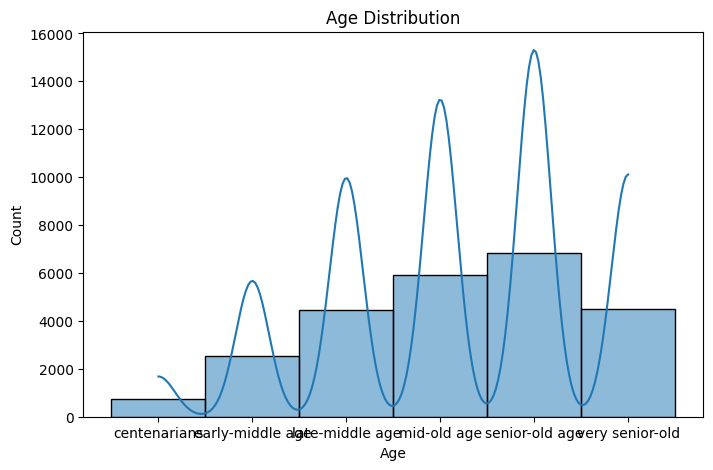

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["age_cat"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
# To display the current column names of the dataset
df.columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty',
       'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag',
       'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted',
       'age_cat'],
      dtype='object')

***Distribution of Numerical Variables***

This cell creates histograms to visualize the distribution of several numerical columns in the dataset. The histograms are plotted for the following numerical variables: time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, and n_emergency.

**Subplots:** Each variable is displayed as a separate histogram.

**X-axis:** Represents the values of the respective numerical variables.

**Y-axis:** Represents the count or frequency of those values.

**Figure Size:** The entire grid layout is presented in a 12x8 plot for clarity.

* **time_in_hospital:** Most patients stay in the hospital for a short duration (2–7 days), with a steep decline for longer stays.

* **n_lab_procedures:** Lab procedures are concentrated around 40–80, indicating the common range of tests performed.

* **n_procedures:** The majority of patients undergo fewer than 2 procedures.

* **n_medications:** Most patients are prescribed between 10–30 medications, with fewer patients receiving higher numbers.

* **n_outpatient, n_inpatient, n_emergency:** These variables are heavily skewed, with the majority of patients having zero visits in these categories. A small fraction of patients have higher counts, as evident from the long tails in their distributions.

These plots helps us to identify patterns, trends, and anomalies in the numerical features.
To assess skewness, spread, and potential outliers in the data.

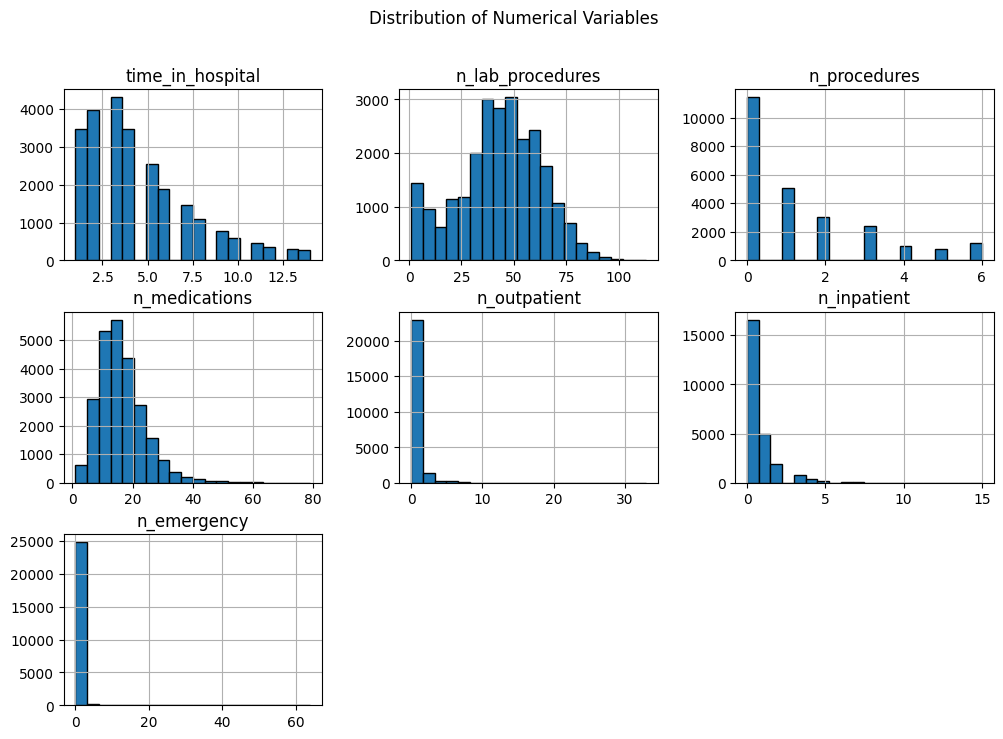

In [ ]:
# List of numerical columns
num_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures',
            'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
# Histograms
df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

***Readmission Rate by Age Category***

This cell visualizes the relationship between age categories and hospital readmission rates using a count plot. The age_cat column represents different age groups, and the readmitted column indicates whether a patient was readmitted to the hospital.

**Plot Type:** Count plot, showing the frequency of readmitted values across different age categories.

**X-axis:** Represents age categories such as centenarians, early-middle age, late-middle age, etc.

**Y-axis:** Represents the count of patients in each age category.

**Hue:** Differentiates between the two categories of readmitted (yes and no) with distinct colors from the viridis palette.

* This plot identify patterns or trends in hospital readmissions based on patient age categories.

* To assess if specific age groups are more prone to readmission, which may guide targeted interventions.

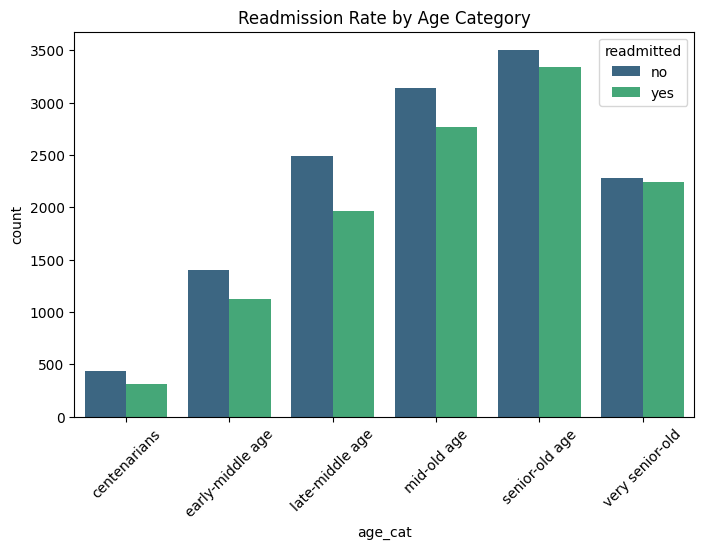

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_cat', hue='readmitted', palette='viridis')
plt.title("Readmission Rate by Age Category")
plt.xticks(rotation=45)
plt.show()

***Readmission by Medical Specialty***

This cell creates a horizontal count plot using Seaborn to analyze the relationship between medical specialties and patient readmission status.

**Y-axis:** Represents the top 10 most frequent medical specialties in the dataset, sorted in descending order of their occurrence.

**X-axis:** Shows the count of patients associated with each medical specialty.

**Hue:** Differentiates readmission status (no or yes) with distinct colors.

* This plot is useful to examine the distribution of patient readmissions across different medical specialties.

* To identify specialties with a higher or lower likelihood of readmission.


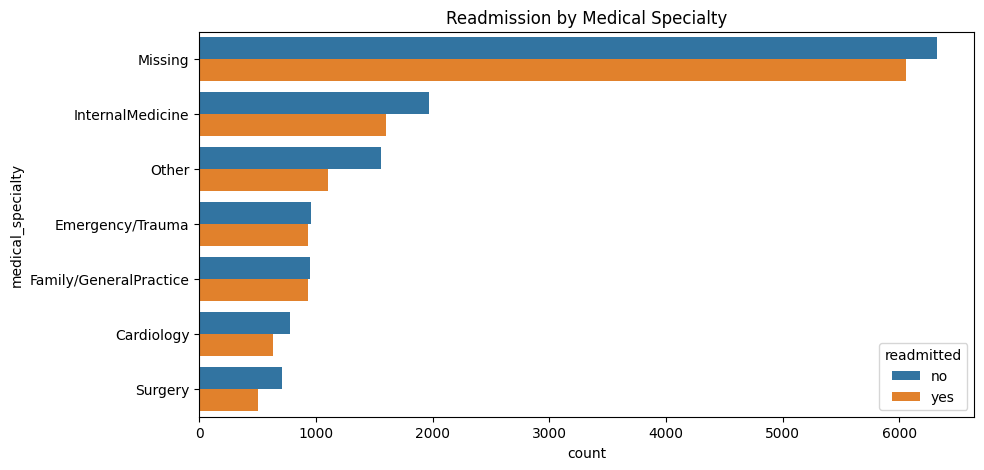

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='medical_specialty', hue='readmitted', order=df['medical_specialty'].value_counts().index[:10])
plt.title("Readmission by Medical Specialty")
plt.show()

***Correlation Heatmap***

This cell generates a correlation heatmap to visualize the relationships between numerical features in the dataset.

The heatmap displays the pairwise correlation coefficients between numerical columns in the dataset.

**Color Scheme:**

* Positive correlations are represented by shades of red (closer to +1).

* Negative correlations are represented by shades of blue (closer to -1).

* Zero or near-zero correlations appear as neutral shades.

* Annotations: Each cell includes the correlation coefficient value for clarity.

**Key Observations:**

* Strong Positive Correlations:
n_medications and time_in_hospital show a moderately high correlation (0.

  1.   n_medications and time_in_hospital show a moderately high correlation (0.45), suggesting that patients who spend more time in the hospital tend to receive more medications.
  2.   n_procedures and n_medications also exhibit a positive correlation (0.37), indicating a possible association between the number of procedures and medications prescribed.

* Low or Negligible Correlations:

     n_outpatient, n_inpatient, and n_emergency generally show weak or negligible correlations with most other features, including each other.

* Independent Features:

     Features like n_lab_procedures and n_emergency are largely uncorrelated with other features.

**Purpose:**

To identify the strength and direction of relationships between numerical features.

To provide insights into which variables might influence each other and potentially impact patient outcomes or healthcare resource utilization.

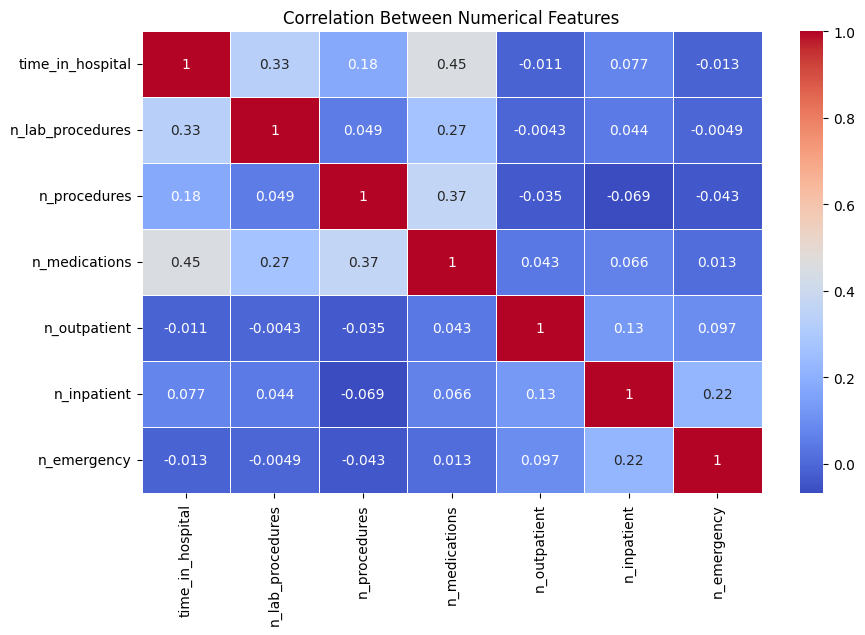

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numerical Features")
plt.show()

***Subsetting Patients Based on Diagnosis***

This cell divides the dataset into two subsets: patients with a diabetes (DM) diagnosis and those without (non-DM), and counts the number of patients in each group.

**Subsetting Patients:**

* Non-Diabetes Patients (non_diabetes_pt):

* Patients are filtered out if none of their diagnostic fields (primary_diagnosis, sec_diagnosis, or additional_sec_diag) contain the term "Diabetes".

* The tilde (~) operator is used to negate the condition, ensuring that only non-DM patients are included.

**Diabetes Patients (diabetes_pt):**

* Patients are selected if any of the diagnostic fields (primary_diagnosis, sec_diagnosis, or additional_sec_diag) contain the term "Diabetes".

* Logical OR (|) operators combine the conditions for the three diagnostic fields.

**Counting Patients:**

* len(non_diabetes_pt.index): Counts the number of rows (patients) in the non_diabetes_pt subset.

* len(diabetes_pt.index): Counts the number of rows (patients) in the diabetes_pt subset.


To separate and compare patients based on their diabetes diagnosis status.

This allows for further analysis of differences between the two groups, such as treatment plans, outcomes, or resource utilization.

This segmentation is useful for comparing clinical characteristics or outcomes of diabetic vs. non-diabetic patients in the dataset.

In [ ]:
#subsetting patient with non-DM diagnosis
non_diabetes_pt = df[~((df['primary_diagnosis'] == 'Diabetes') | (df['sec_diagnosis'] == 'Diabetes') |
    (df['additional_sec_diag'] == 'Diabetes'))]

#subsetting patient with DM diagnosis
diabetes_pt = df[(df['primary_diagnosis'] == 'Diabetes') | (df['sec_diagnosis'] == 'Diabetes') |
    (df['additional_sec_diag'] == 'Diabetes')]

#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))

number of non-DM patient:  16212
number of DM patient:  8788


***Distribution of DM Patients Readmitted Data***

This cell visualizes the distribution of diabetic (DM) patients based on their readmission status using a pie chart.

**Purpose:**

* To analyze the proportion of diabetic patients who were readmitted (yes) versus those who were not (no).

* The pie chart provides an easy-to-understand visual summary of these proportions.

**Steps in the Code:**

1.Data Preparation:

* value_counts(normalize=False): Counts the absolute frequency of each category (yes and no) in the readmitted column of the diabetes_pt dataset.

* to_dict(): Converts the frequencies into a dictionary for plotting.

2.Pie Chart Plotting:

* ax.pie: Plots the pie chart with the following parameters:

* sizes: The frequencies of yes and no.

* labels: The categories (yes and no).

* colors: Assigns colors to the categories (lightcoral for no and lightskyblue for yes).

* autopct='%1.1f%%': Displays the percentage of each category on the chart.

* startangle=140: Rotates the chart for a better visual orientation.

* ax.axis('equal'): Ensures the pie chart is circular.

**Conclusion:**

From this graph we can conclude that, the majority of diabetic patients in the dataset were not readmitted (53.5%), but a significant portion (46.5%) were readmitted, indicating the need for targeted interventions to reduce readmissions among diabetic patients.



readmitted
no     4699
yes    4089
Name: count, dtype: int64


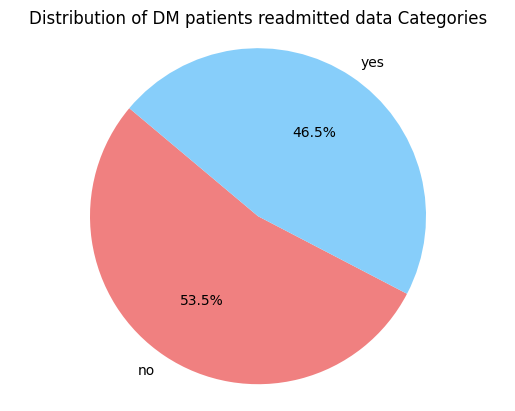

In [ ]:
#plotting the distribution of DM patient readmitted data
readmitted_data = diabetes_pt['readmitted'].value_counts(normalize=False).to_dict()

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightcoral', 'lightskyblue']


# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

print(diabetes_pt['readmitted'].value_counts(normalize=False))
# Show the pie chart
plt.show()

***Distribution of Non-DM Patients Readmitted Data***

This cell visualizes the distribution of non-diabetic (non-DM) patients based on their readmission status using a pie chart.

**Purpose:**

* To examine the proportion of non-diabetic patients who were readmitted (yes) versus those who were not (no).

* The pie chart provides a clear and intuitive view of the proportions.

**Steps in the Code:**

1.Data Preparation:

* value_counts(normalize=False): Counts the absolute frequencies of each category (yes and no) in the readmitted column of the non_diabetes_pt dataset.

* to_dict(): Converts these counts into a dictionary for visualization.

2.Pie Chart Plotting:

* ax.pie: Generates the pie chart with the following settings:

* sizes: The counts of yes and no.

* labels: The categories (yes and no).

* colors: Assigns gold for no and mediumseagreen for yes.

* autopct='%1.1f%%': Displays percentages for each category.

* startangle=140: Rotates the chart for optimal orientation.

* ax.axis('equal'): Ensures the pie chart appears circular.

**Conclusion:**

A slightly larger proportion of non-diabetic patients were not readmitted (52.7%) compared to those who were readmitted (47.3%). This suggests that readmission is a significant issue even among non-diabetic patients, warranting further investigation into potential contributing factors.

readmitted
no     8547
yes    7665
Name: count, dtype: int64


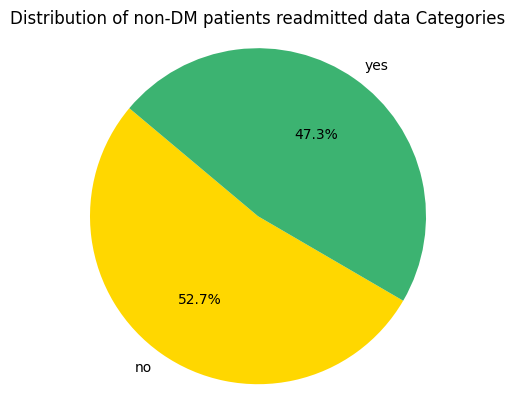

In [ ]:
# plot the distribution of non-DM patient readmitted data
readmitted_data = non_diabetes_pt['readmitted'].value_counts(normalize=False).to_dict()

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['gold', 'mediumseagreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non-DM patients readmitted data Categories')

print(non_diabetes_pt['readmitted'].value_counts(normalize=False))
# Show the pie chart
plt.show()


In [ ]:
#table showing the count of readmitted patient for each diagnosis
# This cell generates a table to display the count of readmitted patients grouped by their diagnoses (primary, secondary, and additional secondary diagnoses).
# It helps in analyzing how different combinations of diagnoses correlate with patient readmissions.
df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()


<ipython-input-24-e40b2ef85567>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()


readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
...                                       ...      ...       ...    ...   
Respiratory       Injury                    7        2         0      2   
                  Missing                   0        1         0      0   
                  Musculoskeletal           8       11         1      0   
                  Other                   247      196        17     14   
                  Respiratory             293      180        16     11   

                                                                             
additional_sec_diag               Missing Musculoskeletal Other Respiratory  
primary_diagnosis sec_diagnosis                                              
Circulatory       Circulatory           2              25   958         366  
                  Diabetes             20              11   331          35  
                  Digestive             0               1    31           4  
                  Injury                0               0    40           6  
                  Missing               0               0     2           0  
...                                   ...             ...   ...         ...  
Respiratory       Injury                0               0     8           4  
                  Missing               0               0     0           0  
                  Musculoskeletal       0               5    13           8  
                  Other                 1              15   358         108  
                  Respiratory           0              10   254         137  

[64 rows x 8 columns]

In [ ]:
#viewing the dataset
df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age


***Visualizing Categorical Columns by Readmitted Status***

**Purpose:**

* This visualization provides insights into the distribution of various categorical features (primary_diagnosis, sec_diagnosis, additional_sec_diag, glucose_test, HbA1c_test, med_change, diabetes_med, age_cat) by the readmitted status of patients.
* Each plot compares the count of patients who were readmitted versus those who were not for each category within the respective features.

**Description of the Plots:**

1.Primary Diagnosis by Readmitted Status:

* The bar chart shows the distribution of primary_diagnosis categories (e.g., Circulatory, Diabetes, Digestive, etc.) by readmission status.

* Categories like Circulatory and Diabetes have the highest counts for both readmitted and non-readmitted patients.

2.Secondary Diagnosis by Readmitted Status:

* This plot displays how sec_diagnosis categories are distributed by readmission status.

* Similar trends are observed, with some diagnoses like Circulatory dominating the distribution.

3.Additional Secondary Diagnosis by Readmitted Status:

* This chart illustrates the additional_sec_diag categories and their relation to patient readmission.

* Categories like Respiratory and Other are prevalent for both readmitted and non-readmitted groups.

4.Glucose Test by Readmitted Status:

* This plot compares the counts for glucose test results (high, normal, no test) by readmission status.

* The majority of patients have no glucose test, but among those tested, normal glucose results show slightly higher readmissions compared to high glucose levels.

5.HbA1c Test by Readmitted Status:

* Displays counts for HbA1c test results (high, normal, no test) by readmission status.

* The majority of patients are in the "no test" category, but patients with high HbA1c levels have a higher proportion of readmissions compared to those with normal levels.

6.Medication Change by Readmitted Status:

* This chart shows the relationship between medication change (yes or no) and readmission.

* Patients with medication changes tend to have higher readmissions compared to those without changes.

7.Diabetes Medication by Readmitted Status:

* Compares whether patients were on diabetes medication (yes or no) and their readmission status.

* Patients on diabetes medication exhibit higher readmissions than those not on medication.

8.Age Category by Readmitted Status:

* Displays the distribution of patients across different age categories (centenarians, early-middle age, late-middle age, senior-old age, etc.) and their readmission status.

* The highest counts are observed in the senior-old and very senior-old age groups, with readmissions being relatively higher in these categories.

These visualizations provide a comprehensive understanding of how different categorical features correlate with patient readmission, helping in identifying risk factors and improving care strategies.



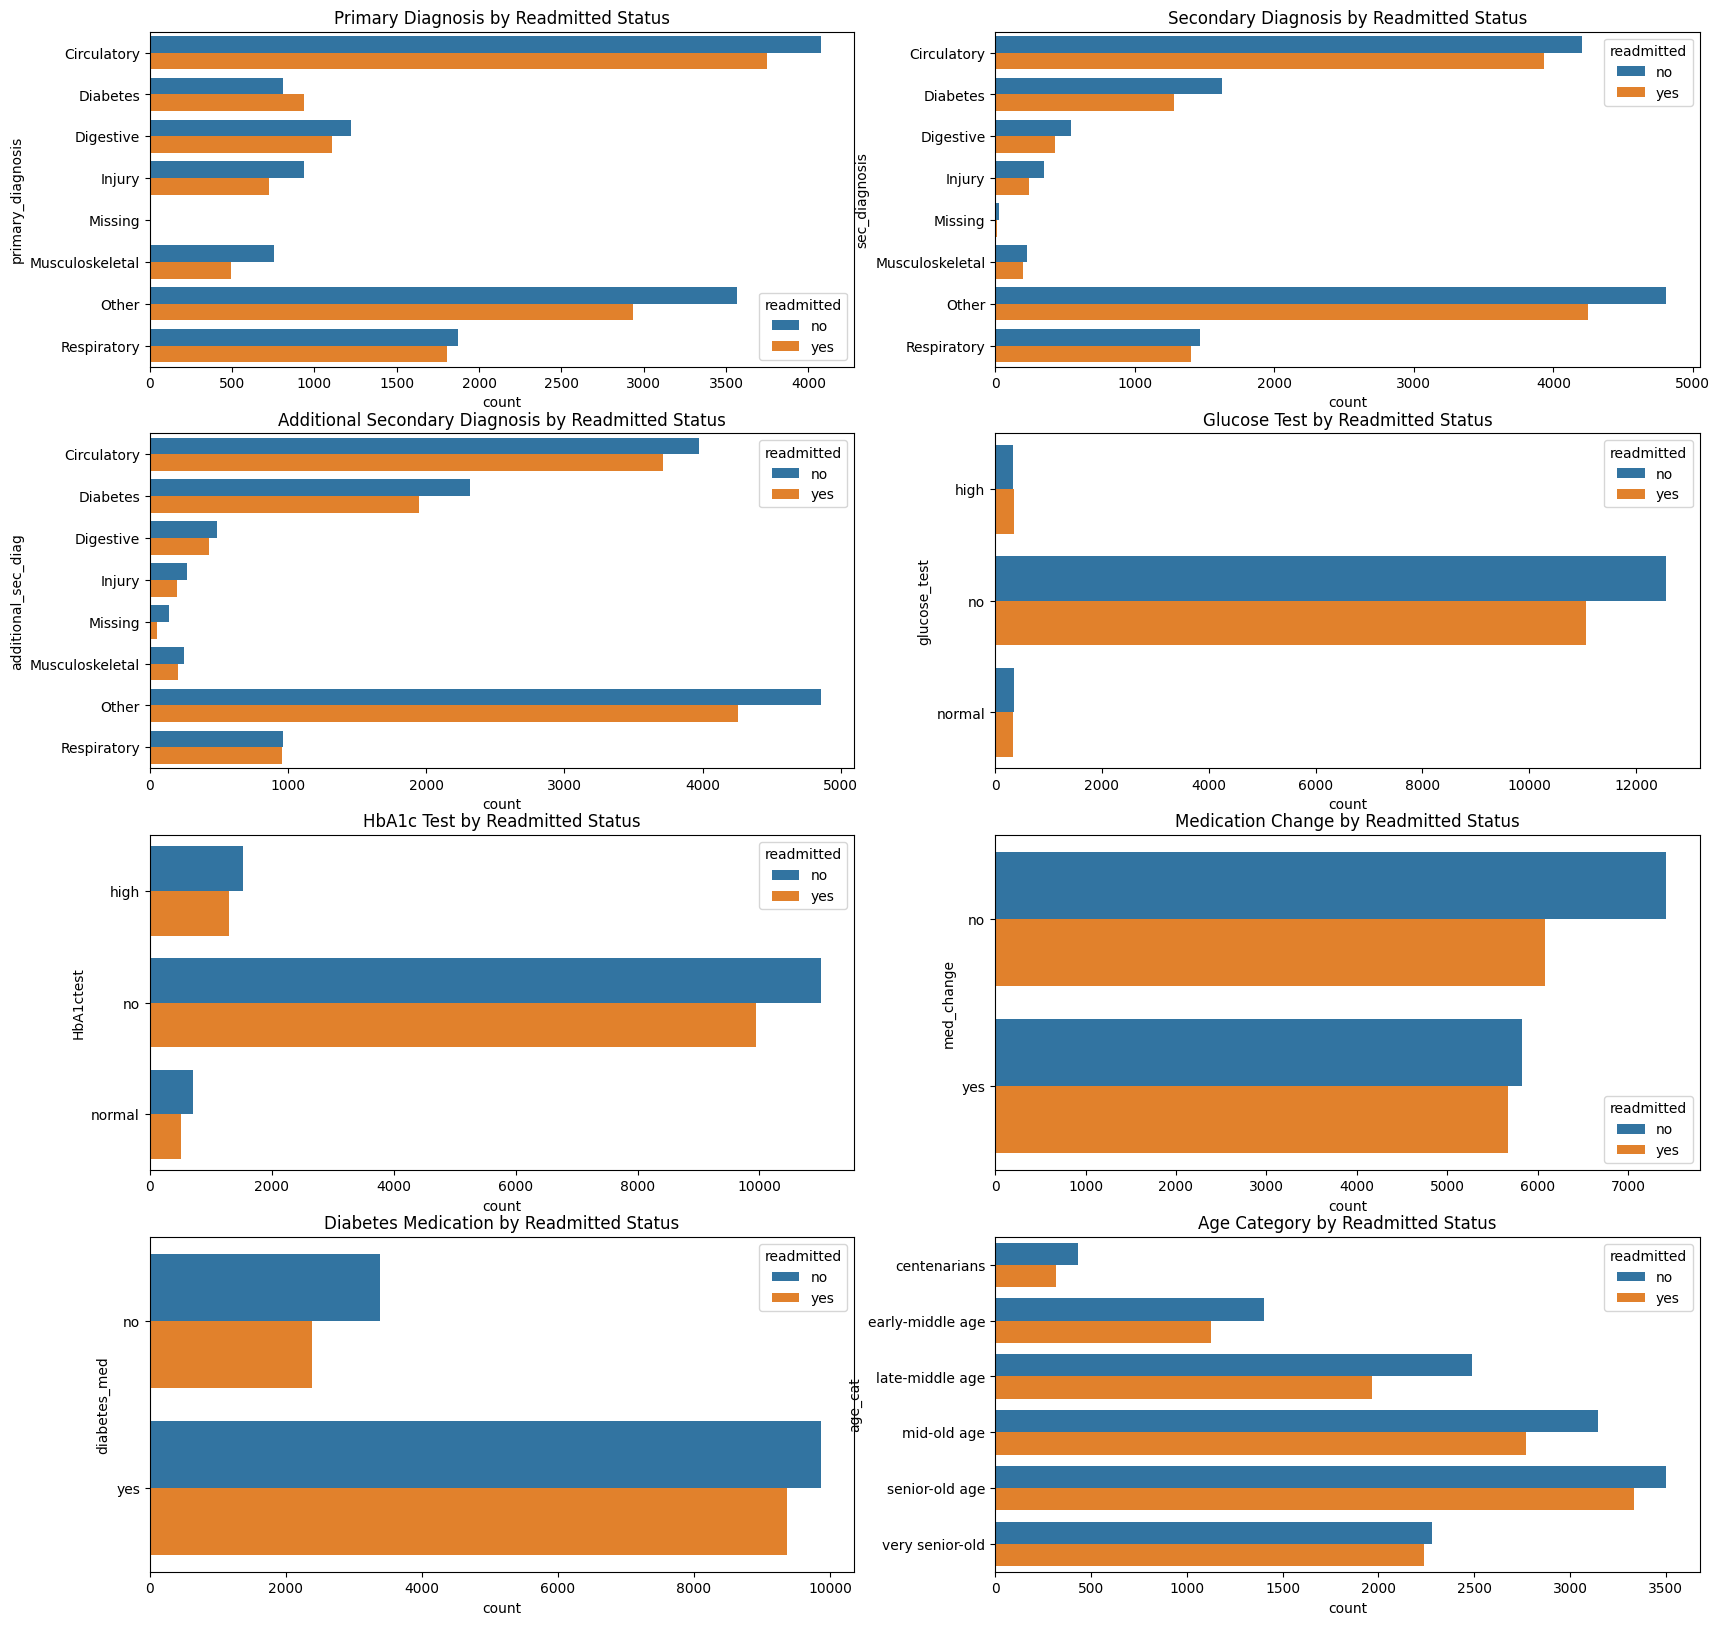

In [ ]:
#visualizing the categorical columns by thier readmitted status

# Create a figure and axis
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Plot the distribution of 'primary_diagnosis' by 'readmitted' status
sns.countplot(y='primary_diagnosis', hue='readmitted', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Primary Diagnosis by Readmitted Status')

# Plot the distribution of 'sec_diagnosis' by 'readmitted' status
sns.countplot(y='sec_diagnosis', hue='readmitted', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Secondary Diagnosis by Readmitted Status')

# Plot the distribution of 'additional_sec_diag' by 'readmitted' status
sns.countplot(y='additional_sec_diag', hue='readmitted', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Additional Secondary Diagnosis by Readmitted Status')

# Plot the distribution of 'glucose_test' by 'readmitted' status
sns.countplot(y='glucose_test', hue='readmitted', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Glucose Test by Readmitted Status')

# Plot the distribution of 'HbA1ctest' by 'readmitted' status
sns.countplot(y='HbA1ctest', hue='readmitted', data=df, ax=ax[2, 0])
ax[2, 0].set_title('HbA1c Test by Readmitted Status')

# Plot the distribution of 'med_change' by 'readmitted' status
sns.countplot(y='med_change', hue='readmitted', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Medication Change by Readmitted Status')

# Plot the distribution of 'diabetes_med' by 'readmitted' status
sns.countplot(y='diabetes_med', hue='readmitted', data=df, ax=ax[3, 0])
ax[3, 0].set_title('Diabetes Medication by Readmitted Status')

# Plot the distribution of 'age_cat' by 'readmitted' status
sns.countplot(y='age_cat', hue='readmitted', data=df, ax=ax[3, 1])
ax[3, 1].set_title('Age Category by Readmitted Status')

# Show the plots
plt.show()

***Converting Categorical Columns to Numerical Columns using Label Encoding
Purpose:***

This step involves converting categorical columns into numerical format using LabelEncoder from the sklearn.preprocessing module. This is necessary for machine learning algorithms, as most of them require numerical input.

**Label Encoding:**

* LabelEncoder is used to convert each unique category in a column into a numerical representation.
* For example, if a column contains values like ['A', 'B', 'C'], they will be converted to [0, 1, 2].

**Columns Encoded:**

The following categorical columns were transformed into numerical format:

* medical_specialty: Encodes the specialty of the medical practitioner.

* primary_diagnosis: Encodes the primary diagnosis categories.

* sec_diagnosis: Encodes the secondary diagnosis categories.

* additional_sec_diag: Encodes additional secondary diagnosis categories.

* age_cat: Encodes age categories into numerical values.

* glucose_test: Encodes the results of glucose tests.

* HbA1ctest: Encodes the results of HbA1c tests.

* med_change: Encodes whether medication was changed (yes or no).

* diabetes_med: Encodes whether the patient was on diabetes medication (yes or no).

* readmitted: Encodes the patient readmission status.

**Insights:**

This transformation ensures that categorical data is properly represented in numerical form, making it suitable for further analysis and modeling. Each unique category in the columns is now associated with a distinct numerical value, preserving the categorical distinctions while allowing computational operations.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ["medical_specialty", "primary_diagnosis", "sec_diagnosis",
                       "additional_sec_diag", "age_cat", "glucose_test", "HbA1ctest",
                       "med_change", "diabetes_med", "readmitted"]

# Initialize and apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for decoding later


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_columns = ["n_lab_procedures", "n_inpatient", "n_emergency"]

# Apply Standard Scaling
scalers = {}
for col in numerical_columns:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    scalers[col] = scaler  # Save scaler for decoding


***Correlation Heatmap***

The purpose of this step is to understand the relationships and dependencies between numerical variables in the dataset by computing and visualizing their correlation matrix using a heatmap.

**Numerical Column Selection:**

* Only numerical columns are selected using df.select_dtypes(include=['number']) to compute meaningful correlations.

**Correlation Matrix:**

The correlation matrix is computed using the .corr() method, which calculates the Pearson correlation coefficients between pairs of numerical columns. These values range from -1 to 1:

* +1: Perfect positive correlation.

* -1: Perfect negative correlation.

* 0: No correlation.

**Heatmap Visualization:**

* A heatmap is used to visualize the correlation matrix.

* The sns.heatmap() function displays the correlation values with a color gradient (cmap='flare') where darker shades indicate stronger correlations.

* The annot=True argument displays the numerical correlation values on the heatmap.

The heatmap helps identify potential relationships between features, which can inform feature selection or further exploratory analysis.

Features with strong correlations could indicate multicollinearity, which may need to be addressed in predictive modeling.

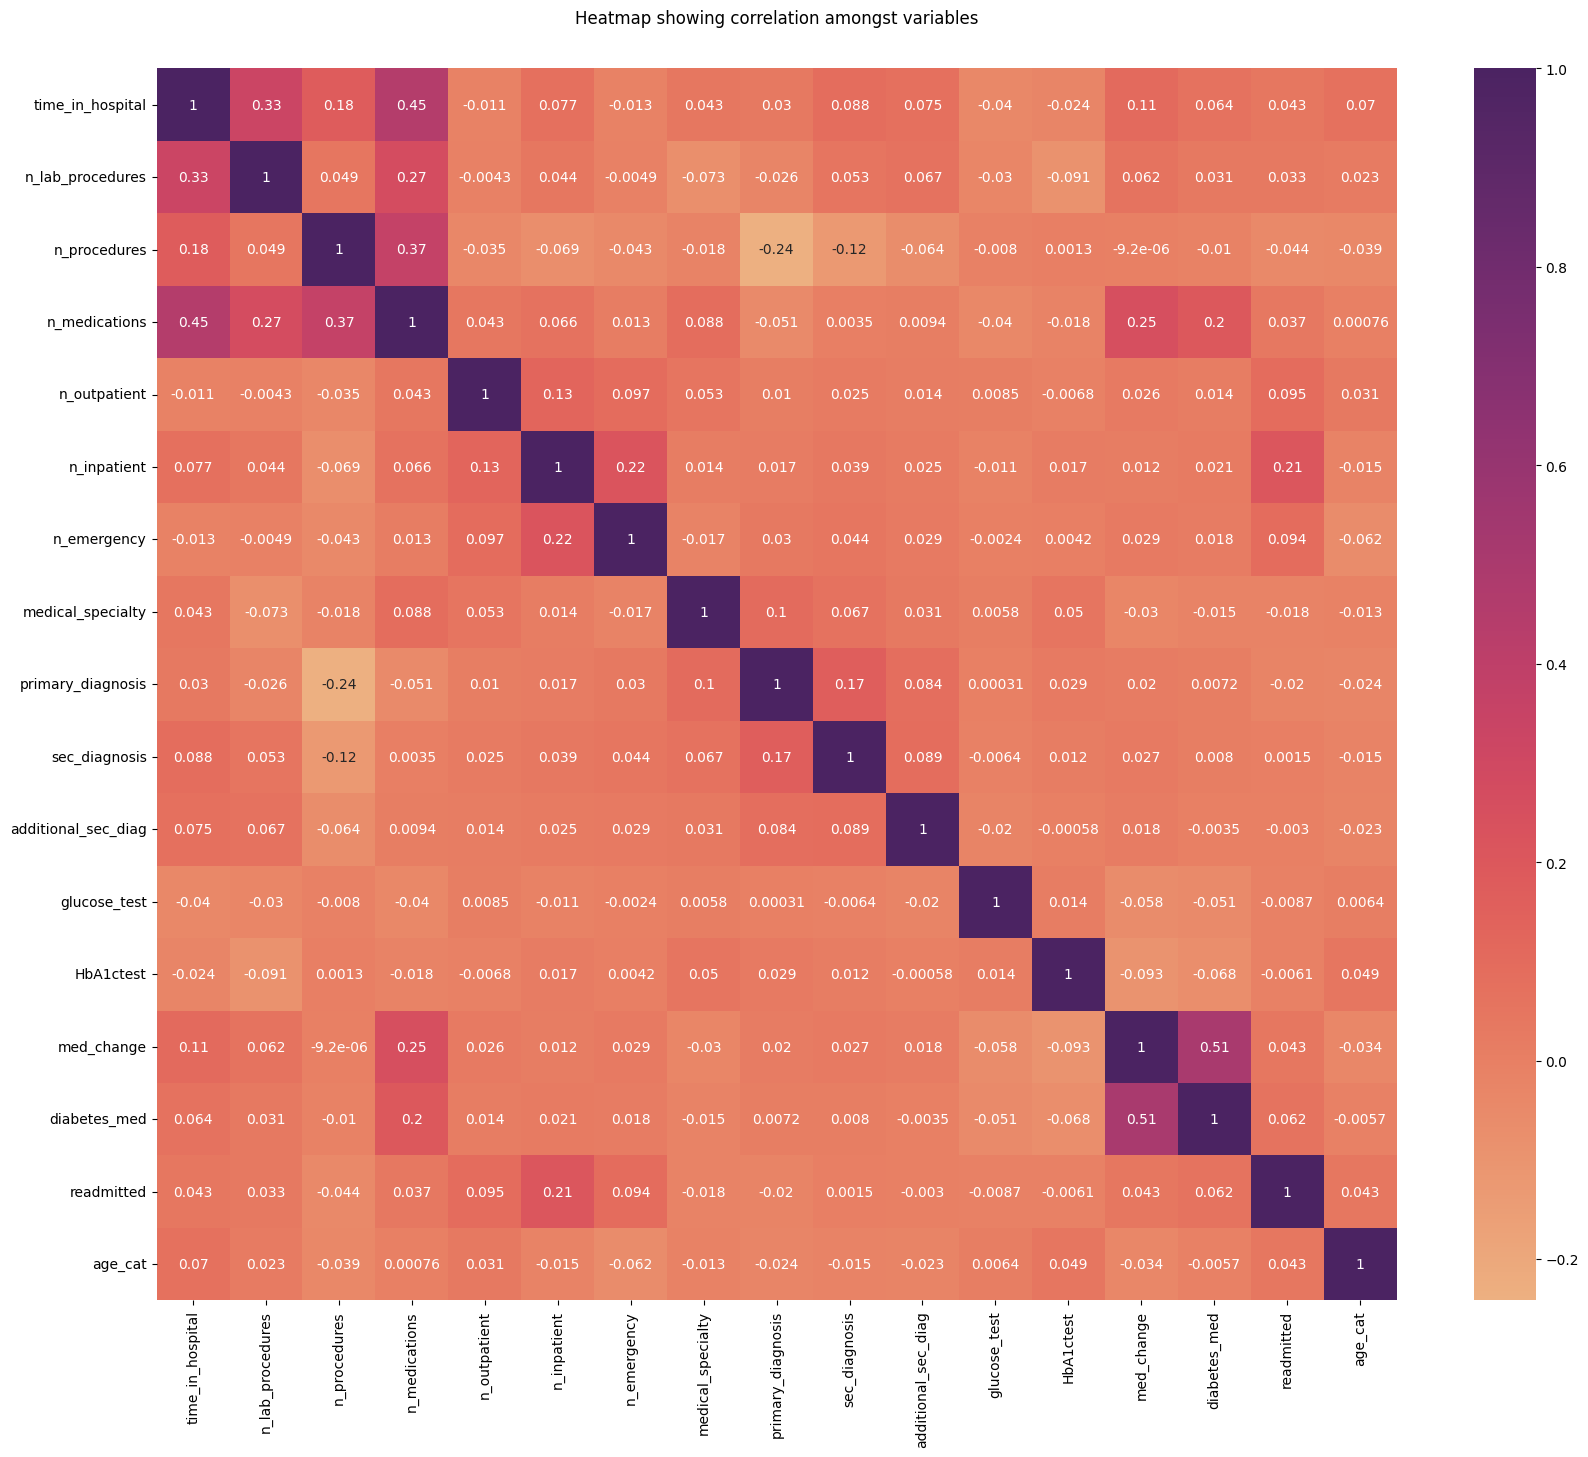

In [ ]:
#show correlation of numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix between selected columns
correlation_matrix = df_numeric.corr()

#visualizing correlation between variables
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, cmap='flare', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

***Feature Preprocessing:***

This step is an essential preprocessing step in machine learning workflows, especially for clustering, to ensure the input data is clean and well-structured.



In [ ]:
# Select columns for clustering
quantCols = df.select_dtypes(include=[int,float]).columns

# Create new DataFrame with clustering variables
df_features = df[quantCols]

df_features

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,1.451151,1,18,2,-0.522918,-0.210644,4,0,7,6,1,1,0,1,0,4
1,3,-0.466276,2,13,0,-0.522918,-0.210644,5,6,6,6,1,1,0,1,0,4
2,5,0.088769,0,18,0,-0.522918,-0.210644,4,0,0,0,1,1,1,1,1,2
3,2,-0.365359,0,12,1,-0.522918,-0.210644,4,0,6,1,1,1,1,1,1,4
4,1,-0.062607,0,7,0,-0.522918,-0.210644,3,6,0,7,1,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,1.703444,1,30,0,-0.522918,-0.210644,4,0,6,0,1,2,0,0,1,5
24996,2,1.148400,0,24,0,-0.522918,-0.210644,4,2,3,6,1,0,1,1,1,5
24997,5,-1.576365,0,6,0,0.326030,-0.210644,4,6,6,6,2,1,0,0,1,4
24998,2,0.896107,3,15,0,-0.522918,-0.210644,2,7,1,6,1,1,1,1,0,4


***Preparing Skewed Columns for Transformation***

This step identifies numerical columns with noticeable skewness and prepares them for potential transformations to normalize their distribution. The goal is to enhance the performance of machine learning models or clustering algorithms by reducing skewness in the data.

**Description:**

1.Identifying Skewed Columns:

* The transformCols list contains the names of columns that are suspected to have noticeable skewness.

* These columns include counts or numerical metrics, such as:

      Columns:
      _____________________
      time_in_hospital
      n_lab_procedures
      n_procedures
      n_medications
      n_outpatient
      n_inpatient
      n_emergency

2.Validating Data Types:

* The all() function, combined with a list comprehension, checks if all the columns in transformCols are numerical.

* The function pd.api.types.is_numeric_dtype() ensures that each column has a numeric data type, confirming their suitability for mathematical transformations.



In [ ]:
#Transforming all colimns that have noticeable skewness
transformCols = ['time_in_hospital','n_lab_procedures','n_procedures',
                 'n_medications','n_outpatient','n_inpatient','n_emergency']
all([pd.api.types.is_numeric_dtype(df_features[col]) for col in transformCols])

True

***Log Transformation of Skewed Data***

This step addresses the skewness in the dataset by applying a logarithmic transformation to specific numerical columns. The goal is to reduce skewness, making the data more symmetric and suitable for analysis and modeling.

**Description:**
1.Log Transformation:

* A new DataFrame df_log is created as a copy of the original feature set to preserve the original data.

* The specified transformCols (previously identified as skewed) undergo a logarithmic transformation using np.log().

* A value of 1 is added to each entry in the column before applying the log transformation to avoid undefined (-inf) values for zero entries.

* Example Formula:
    
    **x′ = log(1+x)**
    
    where

    * x is the original value and
    * x′ is the transformed value.

2.Checking for Infinity Values:

* The np.isinf() function is used to verify if there are any infinite values in the transformed DataFrame df_log.

* Summing the results indicates the number of INF readings in the transformed data.

**Benefits of Log Transformation:**

* **Reduces Skewness:** Logarithmic transformation compresses large values and stretches smaller ones, leading to a more symmetric distribution.

* **Improves Model Performance:** Models, especially those sensitive to data distribution (e.g., regression, clustering), perform better with normalized data.

* **Handles Extreme Values:** Adding 1 before transformation ensures zero values do not result in undefined outputs.

**Insights:**
The process ensures the data is properly transformed and validated, preparing it for subsequent analysis or machine learning tasks. Any presence of infinite values can then be investigated and handled appropriately.

In [ ]:
df_log = df_features.copy()
# Perform a log transformation of the data to unskew the data
for feat in transformCols:
    #Add one to avoid INF values
    df_log[feat] = np.log(1+df_features[feat])

#Check how many INF readings we have in the data
np.isinf(df_log).sum()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
primary_diagnosis,0
sec_diagnosis,0


***Handling Infinite Values***

This step ensures that any infinite (INF) or undefined values resulting from the previous logarithmic transformation are handled appropriately to maintain the integrity of the dataset.

**Benefits:**

* **Ensures Completeness:** Replacing INF values with column means ensures that the dataset remains usable without introducing gaps.

* **Maintains Data Integrity:** The use of column means helps retain the overall statistical properties of the data.

* **Prepares for Analysis:** Cleaning the data in this way is crucial for accurate analysis and modeling, as most algorithms cannot handle INF or NaN values.


In [ ]:
#Change INF values to mean for each feature
for i in transformCols:
    df_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_log[i] = df_log[i].fillna(df_log[i].mean())

np.isinf(df_log).sum()

<ipython-input-33-885e52fd90a3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)


,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
primary_diagnosis,0
sec_diagnosis,0


***Pipeline Creation and Normalization***

This step performs data normalization and dimensionality reduction by combining scaling and Principal Component Analysis (PCA) into a single streamlined process using scikit-learn's make_pipeline function.

**Description**

**1.Importing and Initializing Modules:**

* The make_pipeline function from sklearn.pipeline is used to create a sequential pipeline.

* Two key components are instantiated:

    * StandardScaler: Scales the data to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the analysis.

    * PCA (Principal Component Analysis): Reduces the dimensionality of the dataset while retaining as much variance as possible.

**2.Pipeline Construction:**

A pipeline object is created using make_pipeline, combining the scaler and PCA objects. This ensures that the scaling and PCA transformations are applied sequentially.

**3.Normalization and Dimensionality Reduction:**

* The pipeline is applied to the log-transformed dataset (df_log) using the fit_transform method.

* The output is a normalized dataset (df_normalized) in reduced dimensions, ready for further analysis.

**Benefits:**

* **Efficiency:** Combines scaling and dimensionality reduction into a single process, eliminating the need for separate steps.

* **Consistency:** Ensures that the same transformation is applied uniformly to the dataset.

* **Improved Analysis:** Scaling ensures features are comparable, while PCA reduces redundancy and highlights important patterns.



In [ ]:
# import make_pipeline
from sklearn.pipeline import make_pipeline
# Instantiate StandardScaler, PCA as scaler and pca respectively
scaler = StandardScaler()
pca = PCA()
# Create the pipeline using scaler and the pca object
pipeline = make_pipeline(scaler, pca)

# Fit and transform the model
df_normalized = pipeline.fit_transform(df_log)
df_normalized.shape


(25000, 17)

***Pairplot Visualization***

The purpose of the code is to visualize the relationships between key numerical variables in the dataset after preprocessing (log transformation and scaling). The pairplot provides insights into potential patterns or clusters in the data based on the readmitted feature.

***Observations from the Graph:***

* **Clusters:** Certain variables, such as n_inpatient and n_emergency, exhibit distinct clusters.

* **Separability:** The color separation in some scatterplots suggests differences in behavior between readmitted and non-readmitted patients.

* **Skewness Reduced:** The KDE plots show smoother distributions, indicating that the log transformation effectively reduced skewness.



Text(0.5, 1.01, 'Preprocessed Variable Distributions')

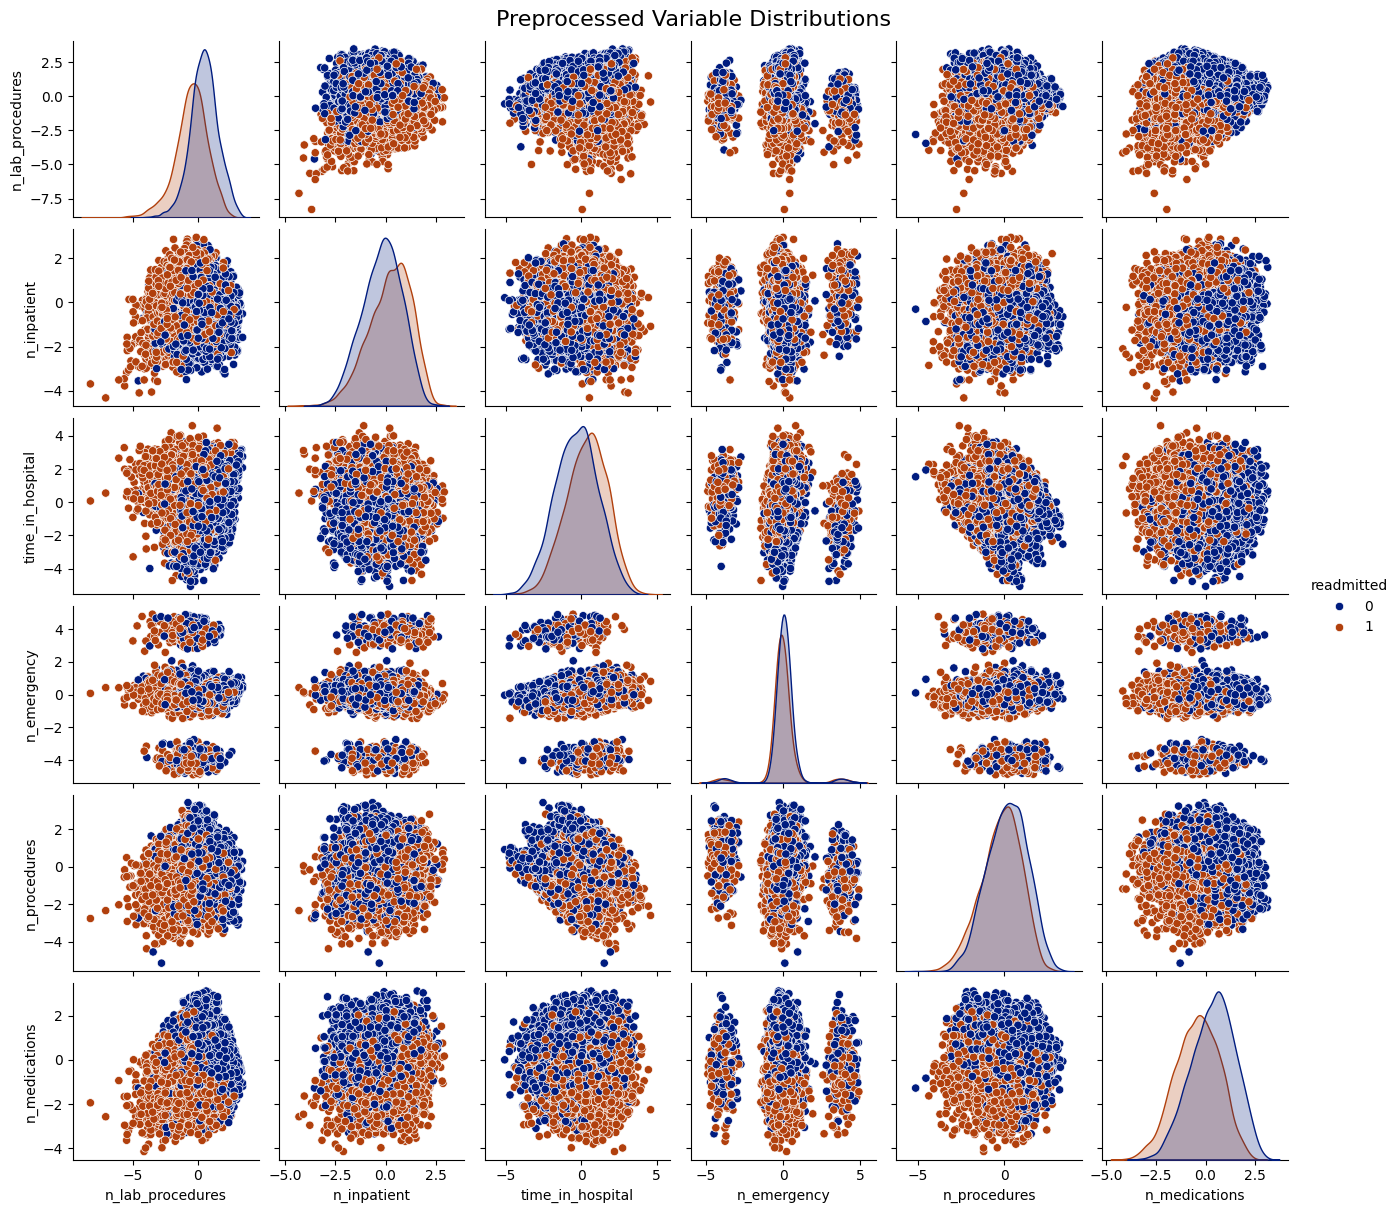

In [ ]:
df_processed = pd.DataFrame(
    data=df_normalized, index=df_log.index, columns=df_log.columns
)
df_processed['readmitted'] = df_features['readmitted']
g = sns.pairplot(data=df_processed.sample(10000),

             vars = ['n_lab_procedures', 'n_inpatient', 'time_in_hospital',
                     'n_emergency', 'n_procedures', 'n_medications'],
             kind="scatter", # kind of plots for each pair {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             diag_kind="kde",   # kind of plots on the diagonal {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             hue="readmitted",
             height=2,
             aspect=1.1,
             palette="dark"
             )
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16, y=1.01)


In [ ]:
# Convert categorical columns to numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate the variance of numerical columns
variance = df_numeric.var()
variance

,0
time_in_hospital,9.008821
n_lab_procedures,1.000040
n_procedures,2.941840
n_medications,64.972173
n_outpatient,1.429168
n_inpatient,1.000040
n_emergency,1.000040
medical_specialty,2.031904
primary_diagnosis,7.996343
sec_diagnosis,8.488636


***Data Splitting***

The code is designed to prepare the dataset for training and evaluating machine learning models by splitting it into features (X) and target variable (y), followed by dividing the data into training and testing subsets.

**Step-by-Step Explanation:**

1.Separating Features and Target Variable:

* X (Features): All columns except the readmitted column are included as features.

* y (Target): The readmitted column is isolated as the target variable, representing the prediction goal (whether a patient is readmitted or not).

2.Splitting the Data:

* The dataset is split into training and testing subsets using the train_test_split function from Scikit-learn.

* Parameters:

    * test_size=0.275: 27.5% of the data is allocated to the test set, ensuring sufficient data for evaluation.

    * random_state=123: A fixed random seed is used to make the split reproducible, so the same subsets are obtained each time the code is run.

In [ ]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_processed.drop(columns=['readmitted'],axis=1)  # Specify at least one column as a feature
y = df_processed["readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.275, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18124, 16), (6876, 16), (18124,), (6876,))

In [ ]:
# Dictionaries to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "AUC-ROC": []
}

***Random Forest Training and Prediction***

The code initializes, trains, and uses a Random Forest Classifier to predict outcomes based on the provided dataset.

**Step-by-Step Explanation:**

1.**Define Parameters:**

* A dictionary params specifies the hyperparameters for the Random Forest model. These parameters need careful tuning to balance the trade-off between overfitting and underfitting:

    * n_estimators=97: The number of trees in the Random Forest.

    * max_depth=10: The maximum depth of each decision tree. This controls the complexity of the model.

    * min_samples_split=3: The minimum number of samples required to split an internal node. A higher value prevents overfitting.

    * min_samples_leaf=1: The minimum number of samples required to be at a leaf node.

    * ccp_alpha=0: The cost-complexity pruning parameter. Setting it to 0 means no pruning is applied.

    * random_state=123: Ensures reproducibility of results by controlling randomization.

2.**Model Initialization:**

* A RandomForestClassifier object (rf) is created using the defined parameters. Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance.

3.**Training the Model:**

* The fit method is used to train the model on the training dataset (X_train and y_train).

4.**Prediction:**

* The trained model is used to predict outcomes on the test dataset (X_test) using the predict method. The predictions (y_pred) represent the classifier's output for the test set.

**Significance:**

* The Random Forest is a robust model for classification tasks, reducing the risk of overfitting by aggregating results from multiple decision trees.

* This step enables the model to learn patterns in the training data and then evaluate its performance on unseen test data.

* The hyperparameters (params) allow fine-tuning to achieve an optimal balance between accuracy and generalization.

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
#{'n_estimators': 97, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

In [ ]:
print('Training Set:', rf.score(X_train,y_train))
print('Test Set:', rf.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Training Set: 1.0
Test Set: 0.9966550319953461
Accuracy: 99.67%
Precision: 99.50%
Recall: 99.78%
Area Under the Curve: 99.67%


***Cross-Validation with Random Forest***

The code performs cross-validation to evaluate the performance of the trained Random Forest Classifier (rf) on the test dataset.

**Step-by-Step Explanation:**

1.**Cross-Validation:**

* cross_val_score is used to compute the scores for the model using a 5-fold cross-validation strategy.

* The dataset (X_test and y_test) is split into 5 subsets or "folds":

* In each iteration, one fold is used as the validation set while the remaining four folds are used for training.

* This ensures that the model is tested on different subsets, providing a more comprehensive evaluation.

2.**Parameters:**

* **rf:** The trained Random Forest Classifier used for prediction.

* **X_test:** The test features on which predictions will be made.

* **y_test:** The true labels corresponding to the test set.

* **error_score="raise":** Raises an error if there is a problem during cross-validation, ensuring no silent failures.

* **cv=5:** Specifies 5-fold cross-validation.

* **verbose=True:** Displays the progress of cross-validation during execution.

Cross-validation reduces the risk of overfitting by evaluating the model on multiple subsets of the data.

In [ ]:
scores = cross_val_score(rf, X_test, y_test, error_score="raise", cv=5, verbose=True)
scores

array([0.9934593 , 0.99054545, 0.99127273, 0.99418182, 0.99490909])

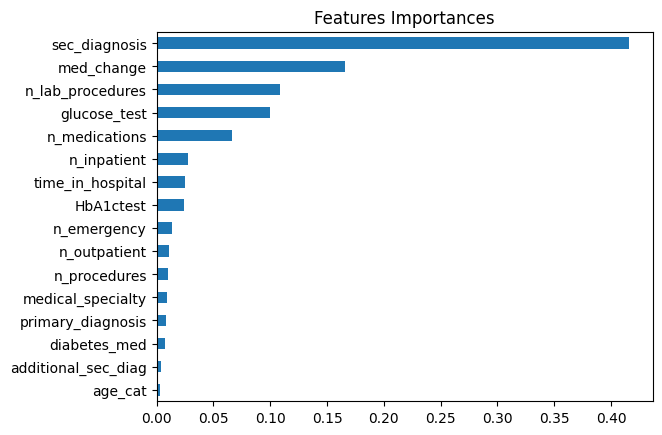

In [ ]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

***Randomized Search Cross-Validation***

The code performs Randomized Search Cross-Validation to tune the hyperparameters of the Random Forest Classifier (rf) and identify the optimal combination of parameters for better performance.

**Step-by-Step Explanation:**

1.**Parameter Grid Definition:**

* The rs_param_grid defines the range of hyperparameters to explore during the randomized search:

    * n_estimators: Number of trees in the forest, ranging from 20 to 199.

    * max_depth: Maximum depth of each tree, ranging from 3 to 14.

    * min_samples_split: Minimum samples required to split a node, ranging from 2 to 4.

    * min_samples_leaf: Minimum samples required at a leaf node, ranging from 1 to 4.

    * ccp_alpha: Cost complexity parameter for pruning, including values [0, 0.001, 0.01, 0.1].

2.**Random Forest Initialization:**

* A RandomForestClassifier object is initialized with a fixed random state for reproducibility.

3.**RandomizedSearchCV:**

* **Purpose:** Efficiently searches for the best combination of hyperparameters by randomly sampling a subset of the parameter grid.

* **Parameters:**

    * estimator=rf: The Random Forest Classifier to be tuned.

    * param_distributions=rs_param_grid: The hyperparameter grid to sample from.

    * cv=3: 3-fold cross-validation is used to evaluate model performance.

    * n_iter=10: Randomly samples 10 different combinations of hyperparameters from the grid.

    * scoring="accuracy": Evaluates model performance using accuracy as the metric.

    * verbose=1: Outputs progress messages during execution.

    * random_state=123: Ensures reproducibility of the parameter search.

4.**Training the Model:**

* The fit() method trains the RandomizedSearchCV object on the training dataset (X_train and y_train).

* The method identifies the best combination of hyperparameters that maximizes accuracy during cross-validation.

5.**Output:**

* **rf_rs.best_params_:** Displays the optimal hyperparameters found during the search.

* **rf_rs.best_score_:** Displays the highest accuracy achieved during cross-validation.



In [ ]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 15))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a RandomForestRegressor
rf = RandomForestClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with rf and the parameter grid
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=1,  # The higher this is, the more messages are outputed
    scoring="accuracy",  # Metric to evaluate performance
    random_state=123
)

# Train the model on the training set
rf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 110, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 11, 'ccp_alpha': 0}
Best performance:  0.9965239004651414


### ***Model Evaluation and Visualization***

#### 1. **ROC Curve**
- The **Receiver Operating Characteristic (ROC) curve** is plotted to evaluate the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR).
- The curve is generated using the predicted probabilities from the fine-tuned Random Forest model.
- **AUC-ROC Score**: Measures the area under the ROC curve, indicating the model's ability to distinguish between classes.

#### 2. **Confusion Matrix**
- A heatmap of the confusion matrix visualizes the actual vs. predicted classifications.
- Rows represent the **Actual Classes**, and columns represent the **Predicted Classes**.
- Provides insights into True Positives, True Negatives, False Positives, and False Negatives.

#### 3. **Learning Curve**
- The learning curve shows the model's performance on training and cross-validation datasets as the training set size increases.
- **Key Metrics**:
  - Mean and standard deviation of training and cross-validation scores.
- **Observations**:
  - Helps identify underfitting, overfitting, or optimal model performance.

#### 4. **Feature Importances**
- A horizontal bar plot highlights the contribution of each feature to the Random Forest model's predictions.
- Features are sorted in descending order of importance.

#### 5. **Predicted Probabilities vs. Actual Outcomes**
- A pairplot visualizes the distribution of predicted probabilities for "No Readmission" and "Readmission" classes.
- The actual outcomes are included for comparison.

#### 6. **Log Loss**
- Log Loss quantifies the accuracy of the model's predicted probabilities.
- Lower log loss values indicate better calibration and performance.

Each of these visualizations and metrics provides a detailed evaluation of the model's effectiveness, offering insights into its predictive capabilities and areas for improvement.

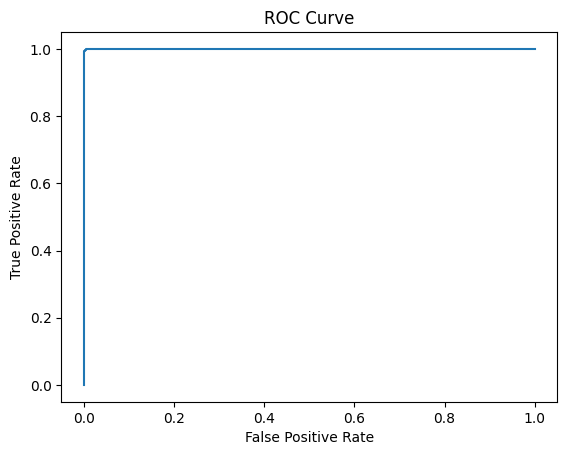

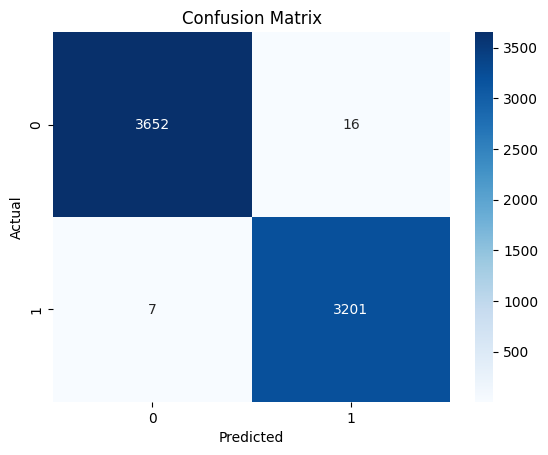

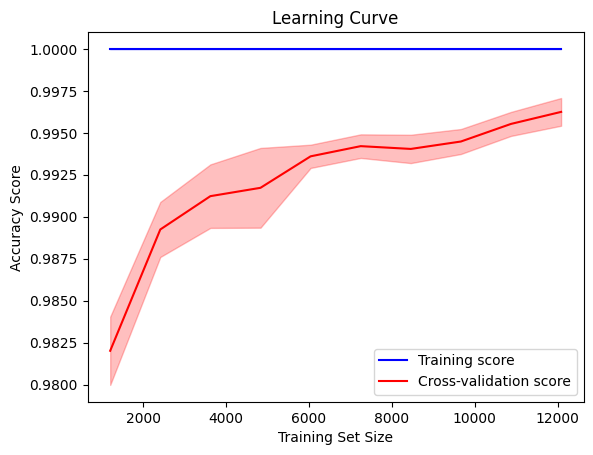

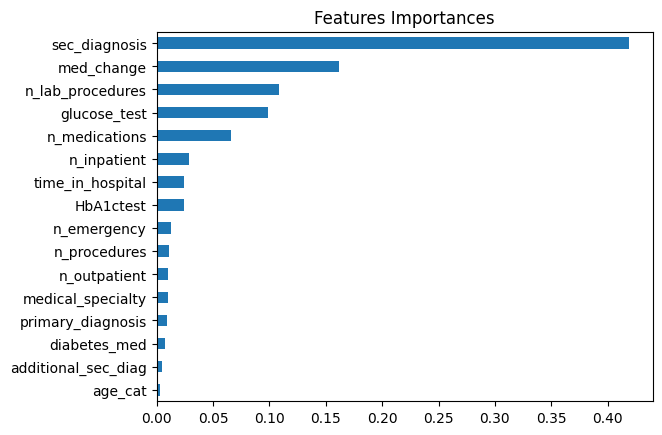

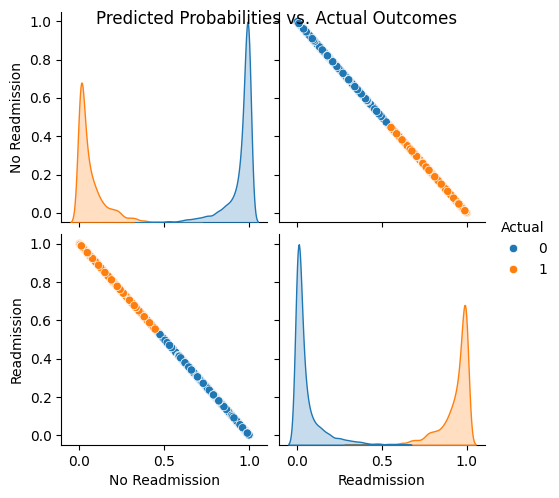

0.06934716274211726

In [ ]:
from sklearn.model_selection import learning_curve
# ploting the ROC curve of the fine-tuned model
# Get the predicted probabilities

y_pred_proba = rf_rs.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Calculate the AUC-ROC score
roc_auc_score(y_test, y_pred_proba)

#plotting the confusion matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#plotting the learning curve
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_rs.best_estimator_,
    X=X_train,
    y=y_train,
    cv=3,
    train_sizes=np.linspace(0.1, 1.0, 10),
)

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(
    train_sizes, train_mean + train_std, train_mean - train_std, color="blue", alpha=0.25
)
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")
plt.fill_between(
    train_sizes, test_mean + test_std, test_mean - test_std, color="red", alpha=0.25
)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

plt.legend()
plt.show()

#plotting the feature importance
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf_rs.best_estimator_.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

#plotting the data distribution
# Create a DataFrame with the predicted probabilities
df_pred = pd.DataFrame(
    data=rf_rs.predict_proba(X_test), columns=["No Readmission", "Readmission"]
)

# Create a DataFrame with the actual outcomes
df_actual = pd.DataFrame(data=y_test.values, columns=["Actual"])

# Concatenate the DataFrames
df_pred_actual = pd.concat([df_pred, df_actual], axis=1)

# Create a pairplot of the predicted probabilities and actual outcomes
sns.pairplot(df_pred_actual, hue="Actual")
plt.suptitle("Predicted Probabilities vs. Actual Outcomes")
plt.show()

#plotting the data loss
# Calculate the log loss
log_loss(y_test, rf_rs.predict_proba(X_test))

### ***Explanation of the Code***

#### 1. **Define Parameters**
The parameter dictionary `params` is defined with `"n_neighbors": 20`. This specifies the number of neighbors to consider when using the K-Nearest Neighbors (KNN) classifier. Adjusting this parameter can help balance the model's tendency to overfit or underfit the data.

#### 2. **Create the Classifier**
A `KNeighborsClassifier` object named `knn1` is created using the unpacked parameters from the `params` dictionary. The classifier will use the specified number of neighbors for making predictions.

#### 3. **Train the Classifier**
The `fit()` method is used to train the `knn1` classifier on the training dataset (`X_train` and `y_train`). This step builds the KNN model based on the training data.

#### 4. **Predict on Test Data**
The trained classifier is then used to predict the outcomes for the test dataset (`X_test`) using the `predict()` method. This generates predicted labels (`y_pred`) for the test data.

#### 5. **Evaluate the Model**
The `score()` method is used to calculate the accuracy of the model on both the training set and the test set. This provides insight into the model's performance:
- **Training Set Accuracy:** Indicates how well the model performs on the data it was trained on.
- **Test Set Accuracy:** Indicates how well the model generalizes to unseen data.

The results are printed to compare the training and test set accuracies, which can help identify issues like overfitting or underfitting.


In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_neighbors": 20
}

# Create a logistic regression classifier object with the parameters above
knn1 = KNeighborsClassifier(**params)

# Train the classifer on the train set
knn1 = knn1.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = knn1.predict(X_test)
print('Training Set:', knn1.score(X_train,y_train))
print('Test Set:', knn1.score(X_test,y_test))

Training Set: 0.998730964467005
Test Set: 0.998109365910413


In [ ]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Accuracy: 99.81%
Precision: 99.88%
Recall: 99.72%
Area Under the Curve: 99.81%


In [ ]:
scores = cross_val_score(knn1, X_test, y_test, error_score="raise", cv=5, verbose=True)
scores

array([0.99636628, 0.99563636, 0.99345455, 0.99345455, 0.99781818])

In [ ]:
#Dimensionality Reduction

dropCols = ['n_medications',
            'n_procedures',
            'time_in_hospital',
            #'n_inpatient',
            #'n_lab_procedures',
            # 'n_emergency',
            'n_outpatient',
            'glucose_test',
            'HbA1ctest',
            'primary_diagnosis',
            'sec_diagnosis',
            'additional_sec_diag',
            ]

df_reduced = df_processed.copy()

for i in dropCols:
    df_reduced.drop(columns = [i], axis=1, inplace=True)

df_reduced

,n_lab_procedures,n_inpatient,n_emergency,medical_specialty,med_change,diabetes_med,readmitted,age_cat
0,0.148799,0.172581,0.374683,-0.728523,0.330441,0.621039,0,-0.170864
1,0.271661,0.202133,-0.147163,-0.128478,-0.288564,-0.795898,0,-0.134318
2,0.717498,0.281888,0.235065,-0.041459,-0.356538,1.495194,1,0.230162
3,-0.735122,1.257447,0.352425,-0.701666,-0.265882,0.604322,1,0.222740
4,-0.229268,-0.124014,-0.302790,0.383156,-0.110758,-0.586597,0,0.164176
...,...,...,...,...,...,...,...,...
24995,1.032592,2.090508,-0.430212,1.091520,-0.778227,1.370377,1,0.483304
24996,0.059005,0.651207,0.359078,-1.753314,-0.984763,-0.466502,1,1.418185
24997,-1.817274,0.753144,3.239924,1.125535,0.289548,0.177493,1,-0.809756
24998,1.010697,0.196190,-0.097741,0.824867,-0.430381,-1.720748,0,-0.152183


In [ ]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_reduced.drop(columns=['readmitted'],axis=1)  # Specify at least one column as a feature
y = df_reduced["readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18750, 7), (6250, 7), (18750,), (6250,))

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    #"C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123,
}

# Create a logistic regression classifier object with the parameters above
clf = LogisticRegression(**params)

# Train the classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)
df_coef = pd.DataFrame(data=clf.coef_[0])

df_coef = df_coef.set_index(np.array(clf.feature_names_in_))
df_coef.rename(columns={0: 'coef'},inplace=True)
df_coef.sort_values('coef')
print(df_coef)

                       coef
n_lab_procedures  -0.932933
n_inpatient        0.431261
n_emergency       -0.231406
medical_specialty -0.105528
med_change        -1.158233
diabetes_med      -0.021275
age_cat           -0.029875


In [ ]:
print('Training Set:', clf.score(X_train,y_train))
print('Test Set:', clf.score(X_test,y_test))


Training Set: 0.7525866666666666
Test Set: 0.7552


In [ ]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))


Accuracy: 75.52%
Precision: 75.79%
Recall: 70.20%
Area Under the Curve: 75.21%


### ***Explanation of the Code***

#### 1. **Importing the Random Forest Classifier**
The `RandomForestClassifier` from `sklearn.ensemble` is imported. This is a robust ensemble learning method based on decision trees, used for both classification and regression tasks.

#### 2. **Define Parameters**
A parameter dictionary `params` is defined with the following keys:
- `"n_estimators": 100` - Specifies the number of decision trees in the forest.
- `"max_depth": None` - Allows the trees to grow until all leaves are pure or contain less than the minimum samples for splitting.
- `"random_state": 123` - Sets a seed for reproducibility of the results.

These parameters can be tuned to prevent overfitting (high training accuracy but low test accuracy) or underfitting (poor performance on both training and test sets).

#### 3. **Create the Random Forest Classifier**
The `RandomForestClassifier` object `clf` is created using the parameters defined in the `params` dictionary. This initializes the model with the specified configuration.

#### 4. **Train the Classifier**
The `fit()` method is used to train the classifier on the training dataset (`X_train` and `y_train`). During training, the classifier builds multiple decision trees and learns patterns in the data.

#### 5. **Predict on the Test Set**
The trained classifier is used to make predictions on the test dataset (`X_test`) using the `predict()` method, producing an array of predicted labels (`y_pred`).

#### 6. **Extract Feature Importances**
The `feature_importances_` attribute of the `RandomForestClassifier` is used to compute the relative importance of each feature. These importance values are stored in a pandas DataFrame, `df_coef`, with the feature names as the index. The DataFrame is then sorted in descending order of importance.

In [ ]:
#Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier

# Define parameters: tune these to prevent overfitting and underfitting
params = {
    "n_estimators": 100,  # Number of trees in the forest
    "max_depth": None,  # Maximum depth of the tree
    "random_state": 123,
}

# Create a Random Forest classifier object with the parameters above
clf = RandomForestClassifier(**params)

# Train the classifier on the training set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Extract feature importances
df_coef = pd.DataFrame(data=clf.feature_importances_, index=np.array(X_train.columns), columns=['importance'])
df_coef = df_coef.sort_values('importance', ascending=False)

# Print feature importances
print(df_coef)

                   importance
med_change           0.363140
n_lab_procedures     0.214117
diabetes_med         0.101122
n_inpatient          0.092022
n_emergency          0.089387
medical_specialty    0.081007
age_cat              0.059205


In [ ]:
print('Training Set:', clf.score(X_train,y_train))
print('Test Set:', clf.score(X_test,y_test))

Training Set: 1.0
Test Set: 0.87584


In [ ]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))


Accuracy: 87.58%
Precision: 88.27%
Recall: 84.78%
Area Under the Curve: 87.42%


***Implementation of XGBoost Classifier***

The code demonstrates the implementation of an **XGBoost Classifier** for a supervised learning task. It uses optimized hyperparameters to improve the model's performance, focusing on tasks such as classification of data points, feature importance extraction, and providing insights into the dataset.

#### **Benefits:**
- **Model Optimization:** The code incorporates advanced hyperparameter tuning to balance model complexity and generalization, reducing overfitting and underfitting.
- **Feature Insights:** By extracting feature importances, the code helps identify which features contribute the most to the model's predictions. This information is invaluable for feature engineering and understanding the dataset.
- **Scalability:** XGBoost is a highly efficient and scalable framework, making it suitable for large datasets and complex predictive modeling tasks.


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "min_child_weight": [1, 3, 5, 7],
    "reg_lambda": [0, 1, 10],
    "reg_alpha": [0, 0.5, 1]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the model using hyperparameter tuning
random_search.fit(X_train, y_train)

# Use the best model from RandomizedSearchCV
best_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#XGBoost with optimized parameters
from xgboost import XGBClassifier

# Define optimized parameters
params = {
    "n_estimators": 1000,  # Increased number of boosting rounds
    "max_depth": 10,  # Increase depth for capturing complex patterns
    "learning_rate": 0.05,  # Lower learning rate for better convergence
    "subsample": 0.8,  # Helps prevent overfitting by using 80% of data per tree
    "colsample_bytree": 0.8,  # Randomly select 80% of features per tree
    "gamma": 0.2,  # Minimum loss reduction for a split, prevents small splits
    "min_child_weight": 5,  # Higher value reduces overfitting
    "reg_lambda": 1,  # L2 regularization (helps prevent overfitting)
    "reg_alpha": 0.5,  # L1 regularization (helps with feature selection)
    "random_state": 123,
    "use_label_encoder": False,  # Suppresses warnings
    "eval_metric": "logloss",  # Log loss as the evaluation metric
}

# Create an XGBoost classifier with optimized parameters
clf = XGBClassifier(**params)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Extract feature importances
df_coef = pd.DataFrame(data=clf.feature_importances_, index=np.array(X_train.columns), columns=['importance'])
df_coef = df_coef.sort_values('importance', ascending=False)

# Print feature importances
print(df_coef)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:37:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                   importance
med_change           0.303563
n_lab_procedures     0.221017
diabetes_med         0.123840
n_emergency          0.099635
n_inpatient          0.095590
medical_specialty    0.095268
age_cat              0.061086


In [ ]:
print('Training Set:', clf.score(X_train,y_train))
print('Test Set:', clf.score(X_test,y_test))

Training Set: 0.9987733333333333
Test Set: 0.8928


In [ ]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Accuracy: 89.28%
Precision: 89.87%
Recall: 86.93%
Area Under the Curve: 89.14%


Text(0.5, 23.52222222222222, 'Predicted label')

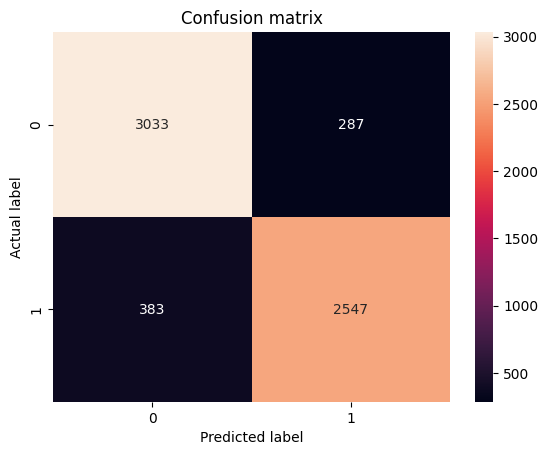

In [ ]:
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

### ***Implementation of XGBoost Classifier and performing hyperparameter tuning***

The code performs **hyperparameter tuning** for an **XGBoost classifier** using `GridSearchCV`, identifies the best combination of hyperparameters for model performance, and evaluates the resulting model. Additionally, it visualizes the feature importances to provide insights into which features contribute most to predictions.

### **Usefulness:**
- **Optimal Model Performance:** By using `GridSearchCV`, the model systematically explores a range of hyperparameter values to find the best configuration.
- **Feature Insights:** The extraction and visualization of feature importances enable better understanding of the dataset, aiding in feature selection and engineering.
- **Visualization:** A bar plot helps to intuitively grasp the importance of different features in the dataset.
- **Reproducibility:** Using cross-validation ensures that the model’s performance is not biased by a single train-test split.

### **Benefits of the Workflow:**
- **Automated Hyperparameter Tuning:** Systematically identifies the best parameter configuration.
- **Enhanced Model Understanding:** Provides clarity on feature importance, aiding interpretability.
- **Reproducibility:** Cross-validation and fixed random state ensure consistent results.
- **Improved Model Performance:** Using tuned parameters results in better predictions and generalization.


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "min_child_weight": [1, 3, 5, 7],
    "reg_lambda": [0, 1, 10],
    "reg_alpha": [0, 0.5, 1]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the model using hyperparameter tuning
random_search.fit(X_train, y_train)

# Use the best model from RandomizedSearchCV
best_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:40:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Access the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predictions on test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the training and test set
print('Training Set Accuracy:', best_model.score(X_train, y_train))
print('Test Set Accuracy:', best_model.score(X_test, y_test))

# Calculate accuracy, precision, recall, and AUC
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred) * 100))
print("Area Under the Curve (AUC):", "{:.2f}%".format(roc_auc_score(y_test, y_pred) * 100))

# Extract feature importances from the best model
df_coef = pd.DataFrame(data=best_model.feature_importances_, index=np.array(X_train.columns), columns=['importance'])
df_coef = df_coef.sort_values('importance', ascending=False)

# Print feature importances
print(df_coef)



Training Set Accuracy: 0.9989866666666667
Test Set Accuracy: 0.8944
Accuracy: 89.44%
Precision: 90.11%
Recall: 87.03%
Area Under the Curve (AUC): 89.30%
                   importance
med_change           0.315661
n_lab_procedures     0.219378
diabetes_med         0.116970
n_emergency          0.096234
medical_specialty    0.094924
n_inpatient          0.094328
age_cat              0.062504


In [ ]:
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", categorical_features)
print("Numerical Columns:", numerical_features)


Categorical Columns: []
Numerical Columns: ['n_lab_procedures', 'n_inpatient', 'n_emergency', 'medical_specialty', 'med_change', 'diabetes_med', 'age_cat']


In [ ]:
import joblib

# Save label encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Save numerical scalers (assuming you're using StandardScaler or MinMaxScaler)
joblib.dump(scalers, "scalers.pkl")


['scalers.pkl']

In [ ]:
# Save the trained model
joblib.dump(best_model, "xgboost_patient_readmission.pkl")



['xgboost_patient_readmission.pkl']

In [ ]:

for col in categorical_columns:
    if col in label_encoders:
        try:
            known_classes = label_encoders[col].classes_
            max_label_value = len(known_classes) - 1  # Max valid index

            df[col] = df[col].apply(lambda x: known_classes[x] if x <= max_label_value else 'Unknown')
        except ValueError as e:
            print(f"Error decoding {col}: {e}")


KeyError: 'medical_specialty'

In [69]:

for col in categorical_columns:
    if col in label_encoders:
        try:
            known_classes = label_encoders[col].classes_
            max_label_value = len(known_classes) - 1  # Max valid index

            df[col] = df[col].apply(lambda x: known_classes[x] if x <= max_label_value else 'Unknown')
        except ValueError as e:
            print(f"Error decoding {col}: {e}")


ValueError: y contains previously unseen labels: ['Cardiology' 'Emergency/Trauma' 'Family/GeneralPractice'
 'InternalMedicine' 'Missing' 'Other' 'Surgery']

In [70]:
for col in categorical_columns:
    if col in label_encoders:
        known_classes = label_encoders[col].classes_
        max_label_value = len(known_classes) - 1  # Max valid index

        df[col] = df[col].apply(lambda x: known_classes[x] if x <= max_label_value else 'Unknown')


TypeError: '<=' not supported between instances of 'str' and 'int'

In [71]:

for col in categorical_columns:
    if col in label_encoders:
        try:
            known_classes = label_encoders[col].classes_
            max_label_value = len(known_classes) - 1  # Max valid index

            df[col] = df[col].apply(lambda x: known_classes[x] if x <= max_label_value else 'Unknown')
        except ValueError as e:
            print(f"Error decoding {col}: {e}")


Error decoding medical_specialty: invalid literal for int() with base 10: 'Missing'
Error decoding primary_diagnosis: invalid literal for int() with base 10: 'Circulatory'
Error decoding sec_diagnosis: invalid literal for int() with base 10: 'Respiratory'
Error decoding additional_sec_diag: invalid literal for int() with base 10: 'Other'
Error decoding age_cat: invalid literal for int() with base 10: 'senior-old age'
Error decoding glucose_test: invalid literal for int() with base 10: 'no'
Error decoding HbA1ctest: invalid literal for int() with base 10: 'no'
Error decoding med_change: invalid literal for int() with base 10: 'no'
Error decoding diabetes_med: invalid literal for int() with base 10: 'yes'
Error decoding readmitted: invalid literal for int() with base 10: 'no'


In [72]:
print(df[categorical_columns].head())



  medical_specialty primary_diagnosis sec_diagnosis additional_sec_diag  \
0           Missing       Circulatory   Respiratory               Other   
1             Other             Other         Other               Other   
2           Missing       Circulatory   Circulatory         Circulatory   
3           Missing       Circulatory         Other            Diabetes   
4  InternalMedicine             Other   Circulatory         Respiratory   

           age_cat glucose_test HbA1ctest med_change diabetes_med readmitted  
0   senior-old age           no        no         no          yes         no  
1   senior-old age           no        no         no          yes         no  
2  late-middle age           no        no        yes          yes        yes  
3   senior-old age           no        no        yes          yes        yes  
4      mid-old age           no        no         no          yes         no  


In [73]:
df.to_csv("decoded_hospital_readmission.csv", index=False)

